# The Mean

In [1]:
distribution = [0,2,3,3,3,4,13]

In [2]:
mean = sum(distribution)/len(distribution)
mean

4.0

The value of the mean is not at the center of the distribution's range, i.e., 6.5.

In [3]:
below = []
above = []

for value in distribution:
    if value < mean:
        below.append(mean - value)
    if value > mean:
        above.append(value - mean)

In [4]:
equal_distances = (sum(above) == sum(below))
equal_distances

True

The sum of the distances of the values that are below the mean is equal to the sum of the distances of the values that are above the mean.

### The Mean as a Balance Point

In [5]:
from numpy.random import randint, seed

In [6]:
# Generate 5000 different distributions.
# Measure the total distances above and below the mean, and check whether they are equal.

equal_distances = 0

for i in range(5000):
    seed(i) # Seed the generator
    
    distribution = randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    below = []
    above = []
    
    for value in distribution:
        if value == mean:
            continue
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
    
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    
    if (sum_above == sum_below):
        equal_distances += 1

print(equal_distances)

5000


This confirms that for each of the 5000 distributions the total distance of the values above the mean is equal to the total distance of the values below the mean.

### Defining a Mean function

In [7]:
def mean_func(distribution):
    sum_dist = 0
    for d in distribution:
        sum_dist = sum_dist + d
        
    return sum_dist / len(distribution)

distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]

print(mean_func(distribution_1))
print(mean_func(distribution_2))
print(mean_func(distribution_3))

27.25
46.857142857142854
8.714285714285714


### Exploring the Data

We'll be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set.

In [8]:
import pandas as pd

In [9]:
# AmesHousing_1.txt is a TSV (tab-separated value) file

houses = pd.read_table('AmesHousing_1.txt')

In [10]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [11]:
houses['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
pandas_mean = houses['SalePrice'].mean()
pandas_mean

180796.0600682594

In [23]:
function_mean = mean_func(houses['SalePrice'])
function_mean

180796.0600682594

In [24]:
means_are_equal = (pandas_mean == function_mean )
means_are_equal

True

### Estimating the Population Mean

In [25]:
mean_parameter = houses['SalePrice'].mean()
mean_parameter

180796.0600682594

In [27]:
sample_size = 5

sample_sizes = []
sampling_errors = []

for i in range(100):
    distribution = houses['SalePrice'].sample(sample_size, random_state = i)
    sample_mean = sum(distribution)/len(distribution)
    sampling_errors.append(mean_parameter - sample_mean)
    sample_sizes.append(sample_size)
    sample_size = sample_size + 29

### Visualizing the sampling error

In [29]:
import matplotlib.pyplot as plt

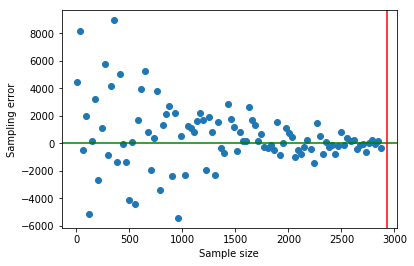

In [36]:
plt.scatter(sample_sizes, sampling_errors)
plt.axhline(0, c = "green") # illustrates the point where the sampling error is 0
plt.axvline(2930, c = "red")# illustrates the population size
plt.xlabel('Sample size')
plt.ylabel('Sampling error')

In [40]:
### Visualizing the distribution of sample means

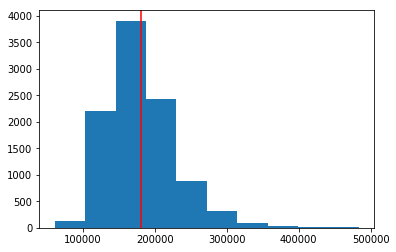

In [39]:
means = []

for i in range(10000):
    sample = houses['SalePrice'].sample(3, random_state = i)
    means.append(sample.mean())

plt.hist(means)
plt.axvline(houses['SalePrice'].mean(), c = 'red')

Most sample means cluster around the population mean.

(0, 500000)

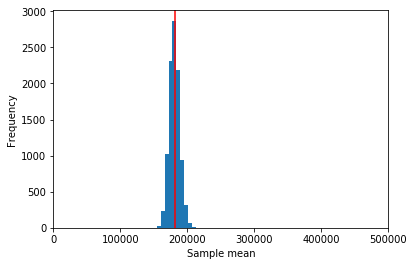

In [41]:
means=[]

for i in range(10000):
    sample = houses['SalePrice'].sample(100, random_state = i)
    means.append(sample.mean())
    
plt.hist(means)
plt.axvline(houses['SalePrice'].mean(), c = "red")
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0,500000)

With a sample size of 100, the sample means vary much less around the population mean than in the case of a sample size of 3. 

### The sample mean is an **unbiased estimator** of the population mean

In [42]:
population = [3, 7, 2]

samples = [[3, 7], [3, 2],[7, 2], [7, 3],[2, 3], [2, 7]]

sample_means = []

for sample in samples:
    sample_means.append(sum(sample) / len(sample))
    
population_mean = sum(population) / len(population)
mean_of_sample_means = sum(sample_means) / len(sample_means)

unbiased = (population_mean == mean_of_sample_means)
unbiased

True